# **Predictive Analytics: Kualitas Anggur Merah**

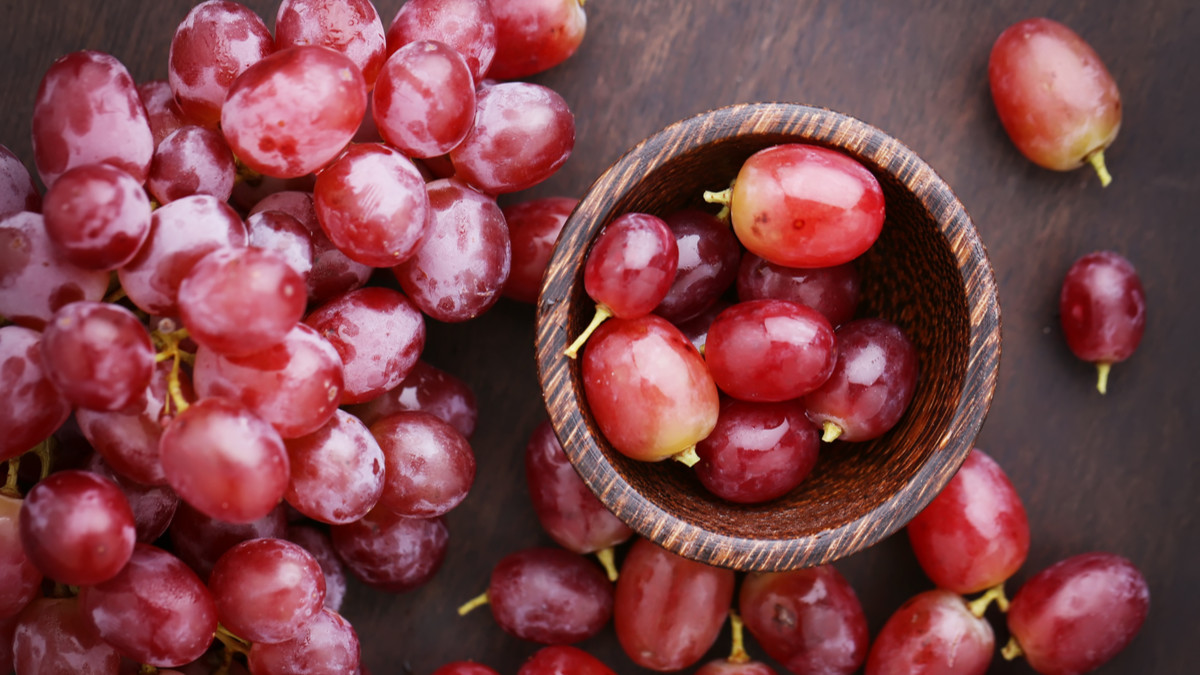

**Deskripsi Proyek**

Proyek ini bertujuan memprediksi kualitas anggur merah secara otomatis menggunakan Machine Learning Predictive Analysis, menghindari metode manual yang subjektif dan rentan error. Dengan memanfaatkan dataset seperti kadar alkohol, pH, asam volatil, dan parameter kimia lainnya, model machine learning seperti Random Forest atau Gradient Boosting akan dilatih untuk mengklasifikasikan kualitas anggur (misalnya, skala 0–10) secara akurat. Hasil analisis ini dapat membantu industri wine dalam pengambilan keputusan berbasis data, meningkatkan konsistensi kualitas, dan mengoptimalkan proses produksi.

# 1. Import Library

In [1]:
#Import Load data Library
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

#Import Train test split
from sklearn.model_selection import train_test_split
#import Minmaxscaler
from sklearn.preprocessing import MinMaxScaler
#import Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import classification_report , ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# 2. Data Understanding

## 2.1 Data Loading

**Informasi Data**

| Jenis       | Keterangan                                                                 |
|-------------|---------------------------------------------------------------------------|
| Title       | Red wine Quality                                                           |
| Source      | [Kaggle ](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009?select=winequality-red.csv)                                                                   |
| Maintainer  | [UCI Machine Learning](https://www.kaggle.com/organizations/uciml)                                                 |
| License     | Other (specified in description)                                          |
| Visibility  | Publik                                                                    |
| Tags        | Earth And Nature, Education, Beginner,Alcohol, Benchamark |
| Usability   | 8.82                                                                     |

In [2]:
# Download latest version
import kagglehub
redWine_quality_path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")

print('Data source import complete.', redWine_quality_path)

Data source import complete. /kaggle/input/red-wine-quality-cortez-et-al-2009


In [3]:
files.upload()

Saving archive.zip to archive.zip


{'archive.zip': b'PK\x03\x04-\x00\x00\x00\x08\x00\xc8\x985O[\x8d\n\n\xff\xff\xff\xff\xff\xff\xff\xff\x13\x00\x14\x00winequality-red.csv\x01\x00\x10\x00W\x8a\x01\x00\x00\x00\x00\x00\x90e\x00\x00\x00\x00\x00\x00\xd5\xbdm\x8e\xed\xca\x91$\xf8\xff\xad\xa2\x16@\\0\xc8\xf8 w0\xdb\x10$\xd5\x94\x00a\xd4\xa3R\rzv?\xc7\xcd\xdc\xcd\x19\xe4I\r\xfad\xaa\xa4\x16\xf0\x9e\xde\xbd\x99A\x06#<\xdc\xcd\xcd?\xe2\xdf\xff\xf4?\xff\xf8\x87\x7f\xfb\xdd\xef\xff\xf4\x87?\xfd\xed\xff]\xfe\x9f\xbf\xfc\xf9w\x7f\xfb\xd3\x9f\xff\xa8\xbf\xf8\xfd\x9f\xfe\xf6\xd7?\xfd\x1e\x7f\\\xfe\xfa\xc7\xff\xfc\xd3\x1f\xfe\xebw\x7f\xfe\xb7\xff\xfc\xaf\xff\xf3w\x7f]~\xff\x1f\x7f\xfe\xcb_\xff\xf4\x87?\xfe\xe7\xf2\xef\x7f\xfd\xe3\x1f_\x7f\xf9\xe7\x7f\xff\xaf\xbf\xfe\xdb\x1f\xfe\xf4\x97\xff\xf9\xfa\xcb\xe5o\x7f\xf9\x1b~s\xfa\xcb?\xfc\xf1\xff\xfaO{\xea\xff\xf8?\x96\xd7O\xfe\xc7\x7f\xfc\xeeo\xaf\xd1\xbf\xfb\xf3\xef\xff\xf2\x1f\x7f\xf9\xf3\xf2\x7f\xbf\x1e\xfd\xfa\xe1o\xe3W]\xd6_\xe3\xf5\xcf\xba\x94_\xa7\xfd\xff\xe8K)\xaf?\xee\xf5\xf5\xaf\xf

In [4]:
zip_ref = zipfile.ZipFile('/content/archive.zip', 'r')
zip_ref.extractall('/content/')
zip_ref.close()


In [5]:
redwine_df = pd.read_csv("/content/winequality-red.csv")

In [6]:
redwine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


dari dataframe diatas kita dapat melihat bahwa pada dataset ini terdapat
- `fixed acidity`; Asam non-volatil yang memengaruhi kestabilan dan rasa.
- `volatile acidity`;	Asam volatil yang tinggi bisa menyebabkan rasa tidak enak.
- `citric acid`; Asam sitrat, penambah kesegaran dan kompleksitas rasa.
- `presidual sugar`; Gula tersisa setelah fermentasi, memengaruhi tingkat kemanisan.
- `chlorides`; Kadar garam, memengaruhi rasa asin/mineral.
- `free sulfur dioxide`; SO₂ bebas, berfungsi sebagai pengawet dan antioksidan.
- `total sulfur dioxide`; Total SO₂ (bebas + terikat), terkait dengan preservasi dan aroma.
- `density`;	Massa jenis wine, berkorelasi dengan alkohol/gula.
-` pH`; Tingkat keasaman (skala logaritmik). pH rendah = lebih asam.
- `sulphates`; Kadar sulfat (e.g., potassium sulphate) yang memengaruhi SO₂ dan rasa.
- `alcohol`; Persentase alkohol, berpengaruh pada body dan rasa.
- `quality`; Target/label kualitas wine (biasanya skala 0-10).

## **2.2 Exploratory Data Analysis (EDA)**
Exploratory data analysis merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data. Teknik ini biasanya menggunakan bantuan statistik dan representasi grafis atau visualisasi

### **2.2.1 Assesing Data**


In [7]:
redwine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


pada eksekusi method df.info() terdapat kolom numerik:
- Terdapat 11 kolom dengan tipe data float yaitu: fixed acidity,volatile acidity,	citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol.
- Terdapat 1 kolom dengan tipe data integer yaitu: quality

In [8]:
redwine_df.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Tidak terdeteksi missing value pada dataset

In [9]:
print("Jumlah duplikasi :",redwine_df.duplicated().sum())

Jumlah duplikasi : 240


terdeteksi terjadinya duplikasi sebanyak 240 data

In [11]:
# Menampilkan semua baris yang duplikat
duplikat = redwine_df[redwine_df.duplicated(keep=False)]  # keep=False akan menandai semua duplikat
duplikat.sort_values(by=list(redwine_df.columns), inplace=True)
duplikat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
142,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
144,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6
131,5.6,0.500,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,5
132,5.6,0.500,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,5
1488,5.6,0.540,0.04,1.7,0.049,5.0,13.0,0.99420,3.72,0.58,11.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
391,13.7,0.415,0.68,2.9,0.085,17.0,43.0,1.00140,3.06,0.80,10.0,6
243,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
244,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
554,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5


In [ ]:
redwine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

- Count adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

In [ ]:
redwine_df.shape

(1599, 12)

dari eksekusi .shape() terlihat bahwa; jumlah baris terdapat 1599 dan jumlah kolom 12

### **2.2.2 Cleaning Data**


### 2.2.3 Duplikasi

In [ ]:
redwine_df.duplicated().sum()

np.int64(240)

In [ ]:
redwine_df.drop_duplicates(inplace=True)
redwine_df.duplicated().sum()

np.int64(0)

In [ ]:
redwine_df.shape

(1359, 12)

Terdapat data duplicate sebanyak 240 dan dilakukan pembersihan dengan menghapus segala data duplicate yang menjadi hasil akhir terdapat 1359 data

### **2.2.4 Visualisasi Outlier**


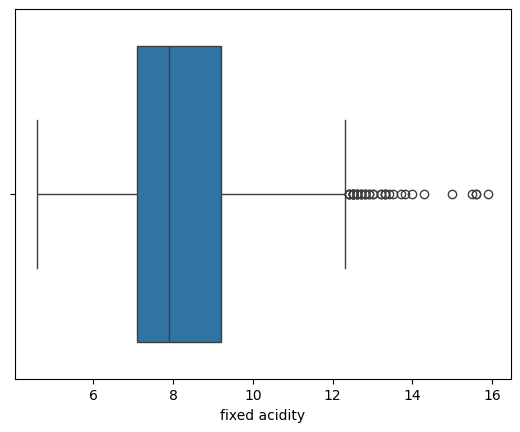

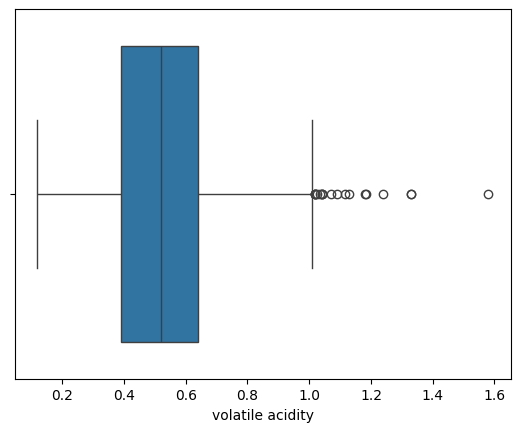

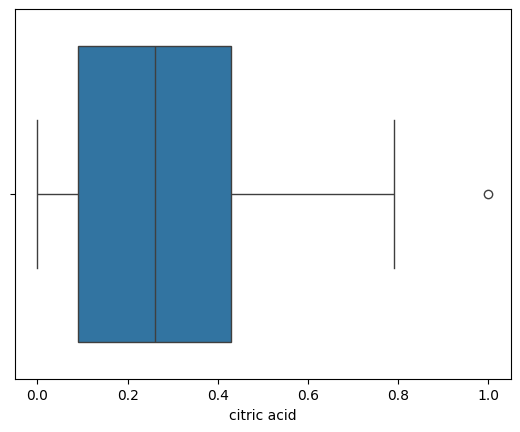

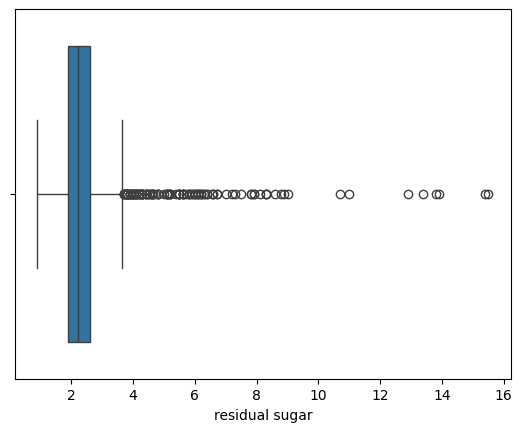

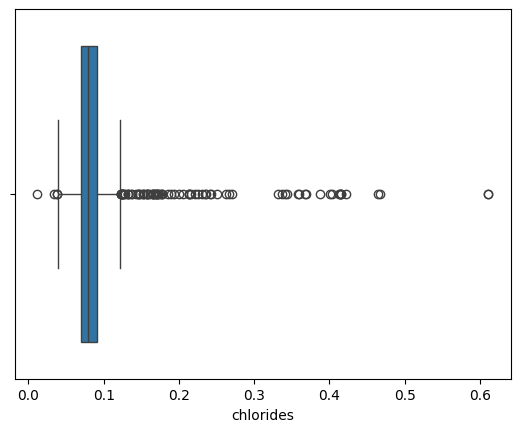

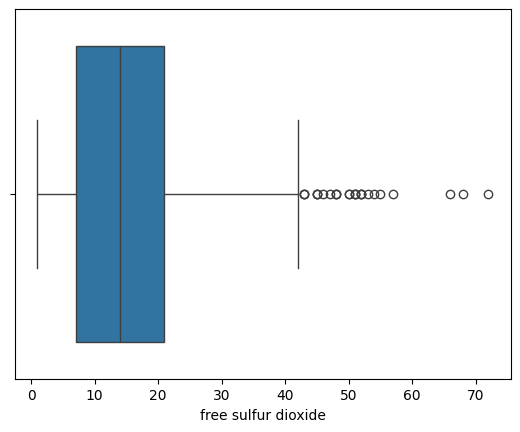

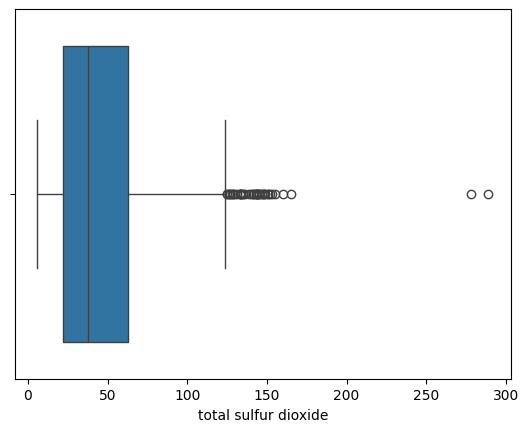

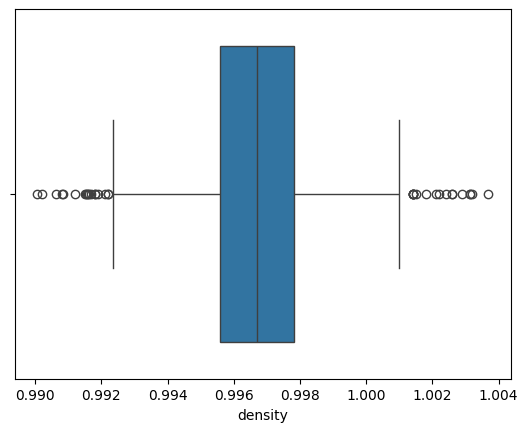

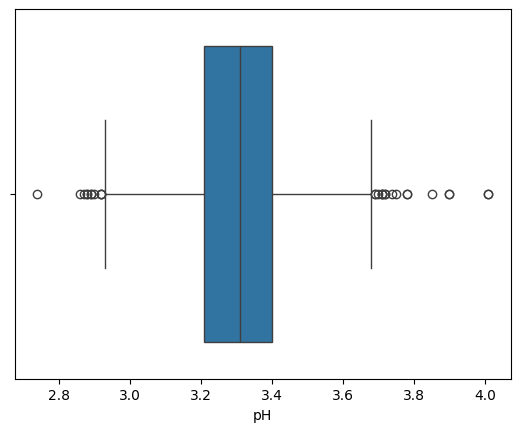

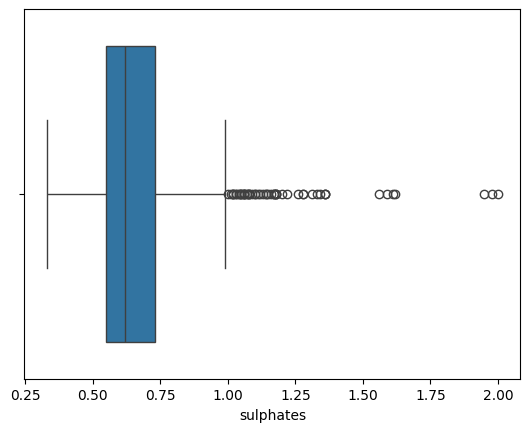

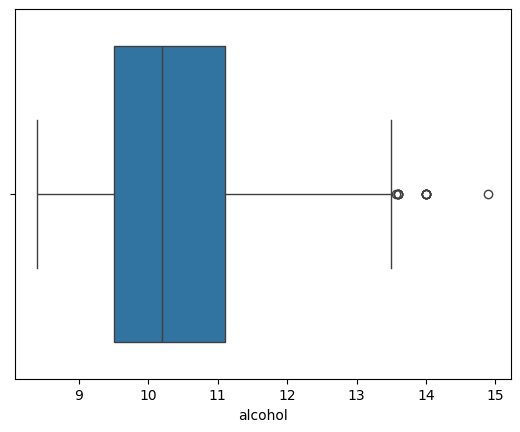

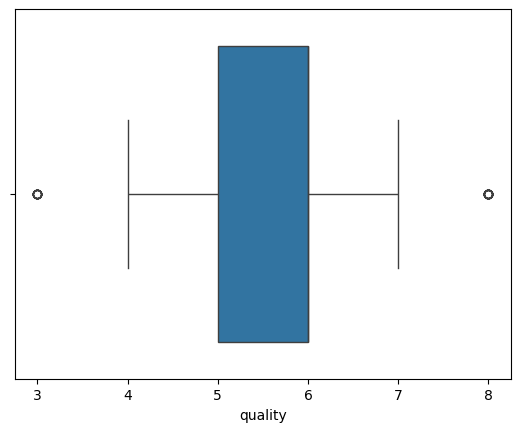

In [ ]:
df_outlier=redwine_df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure()
        sns.boxplot(data=df_outlier, x=column)

Menghapus outliers yang ada pada dataset

Pada kasus ini, kita akan mendeteksi outliers dengan teknik visualisasi data (boxplot). Kemudian, menangani outliers dengan teknik IQR method.

In [ ]:
# Ambil hanya kolom numerikal
numeric_cols = redwine_df.select_dtypes(include='number').columns
# Hitung Q1, Q3, dan IQR hanya untuk kolom numerikal
Q1 = redwine_df[numeric_cols].quantile(0.25)
Q3 = redwine_df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
# Buat filter untuk menghapus baris yang mengandung outlier di kolom numerikal
filter_outliers = ~((redwine_df[numeric_cols] < (Q1 - 1.5 * IQR)) |
                    (redwine_df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
# Terapkan filter ke dataset asli (termasuk kolom non-numerikal)
redwine_df = redwine_df[filter_outliers]
# Cek ukuran dataset setelah outlier dihapus
redwine_df.shape

(1005, 12)

Jumlah Datasets setalah kita hapus Outlier: 1005, 12

### 2.2.5 Univariate Analysis

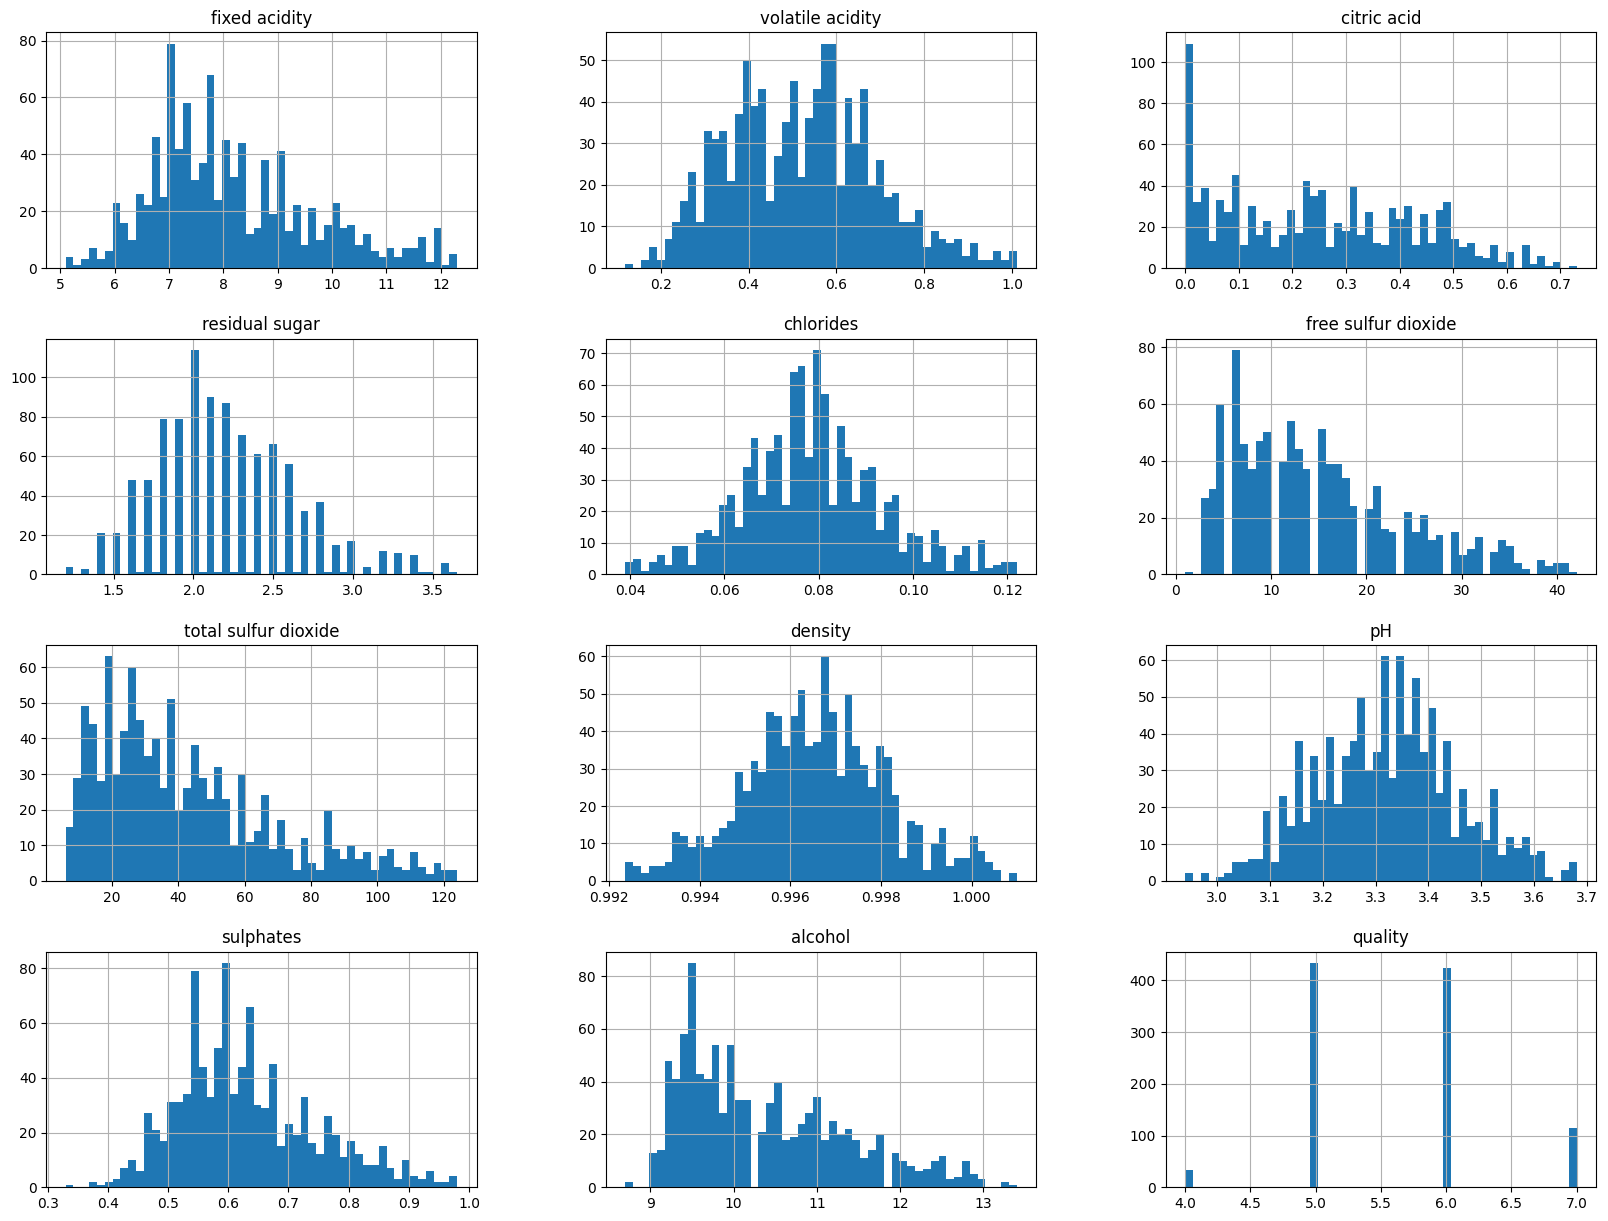

In [ ]:
redwine_df.hist(bins=50, figsize=(20,15))
plt.show()

### 2.2.6 Multivariate Analysis

In [ ]:
sns.pairplot(redwine_df, diag_kind = 'kde')

Output hidden; open in https://colab.research.google.com to view.

Text(0.5, 1.0, 'Matriks Korelasi untuk Fitur Numerik ')

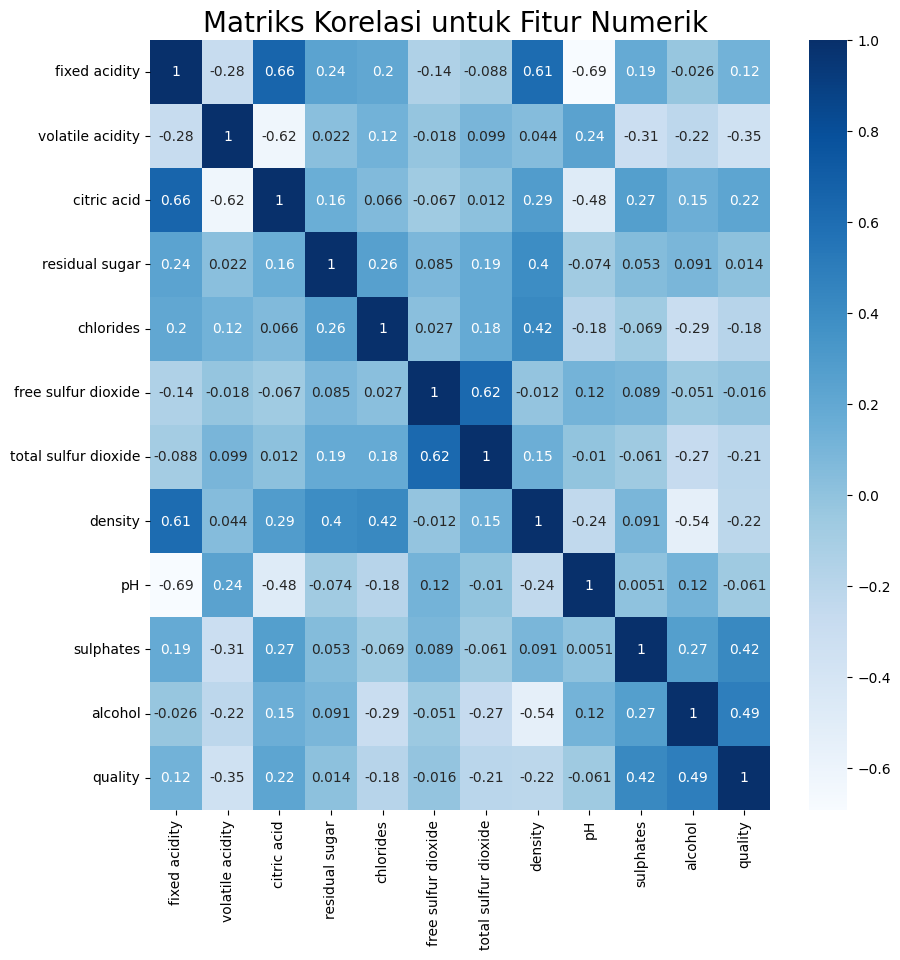

In [ ]:
plt.figure(figsize=(10,10))
corr = redwine_df.corr()
sns.heatmap(corr ,annot=True , cmap= 'Blues');
plt.title(f"Matriks Korelasi untuk Fitur Numerik ", size=20)

Koefisien korelasi berkisar antara -1 dan +1. Ia mengukur kekuatan hubungan antara dua variabel serta arahnya (positif atau negatif). Mengenai kekuatan hubungan antar variabel, semakin dekat nilainya ke 1 atau -1, korelasinya semakin kuat. Sedangkan, semakin dekat nilainya ke 0, korelasinya semakin lemah.

# 3. Data Preparation
Data Preparation merupakan tahap untuk mempersiapkan data sebelum masuk ke tahap pembuatan model Machine Learning


## 3.1 Data Clening

In [ ]:
X = redwine_df.drop(columns= ['quality'])
X.shape

(1005, 11)

In [ ]:
y = (redwine_df['quality'] > 6).astype(int)
y.shape

(1005,)

## 3.2 Train-Test-Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (804, 11)
y_train shape: (804,)
X_test shape: (201, 11)
y_test shape: (201,)


## 3.3 Normalisasi

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

# Model Development

**Lazy Predict Library**

LazyPredict adalah pustaka Python yang memudahkan proses pemilihan model machine learning. Ia melakukan ini dengan secara otomatis mengevaluasi dan membandingkan berbagai algoritma pembelajaran mesin pada kumpulan data.

Keuntungan menggunakan LazyPredict:
- Cepat dan efisien: LazyPredict dapat dengan cepat mengevaluasi dan membandingkan banyak model, menghemat waktu dan tenaga.
- Mempermudah identifikasi model potensial: Alih-alih mencoba berbagai model secara manual, LazyPredict membantu menemukan model yang berpotensi berkinerja baik pada data.
- Cocok untuk analisis awal dan pembuatan prototipe: LazyPredict memudahkan untuk memulai dengan proyek machine learning dengan cepat tanpa terjebak dalam detail pemilihan model.

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier()
models,predicts = clf.fit(x_train,x_test,y_train,y_test)
print(models.sort_values(by="Accuracy",ascending=False))

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 91, number of negative: 713
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 804, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.113184 -> initscore=-2.058622
[LightGBM] [Info] Start training from score -2.058622
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

**Visualisasi Model LazyPredict**

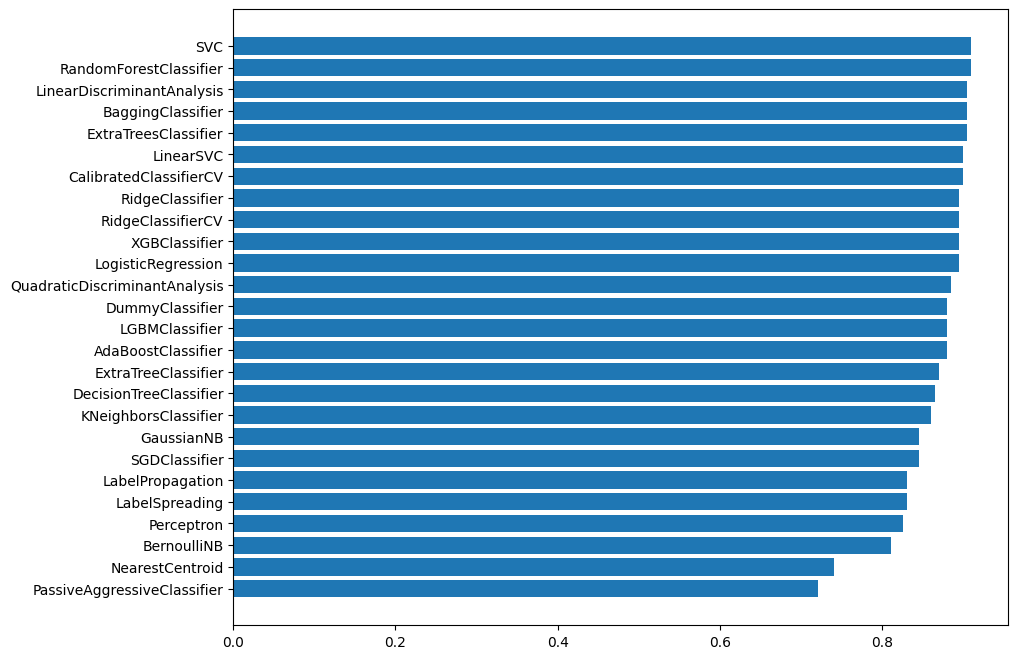

In [ ]:
temp = models.sort_values(by="Accuracy",ascending=True)
plt.figure(figsize=(10, 8))
plt.barh(temp.index,temp["Accuracy"])
plt.show()

## 4.1 KKN (K-Nearest Neighbor)

In [ ]:
k_neighbors = range(2 , 11 , 2)
Training_acc = []
Testing_acc = []

for i in k_neighbors:

    model = KNeighborsClassifier(n_neighbors= i)
    model.fit(X_train , y_train)
    Training_acc.append(model.score(X_train , y_train))
    Testing_acc.append(model.score(X_test , y_test))

print(f'Training accuracy: f{Training_acc}')
print(f'Testing accuracy: f{Testing_acc}')

Training accuracy: f[0.9203980099502488, 0.9079601990049752, 0.8967661691542289, 0.8942786069651741, 0.8905472636815921]
Testing accuracy: f[0.8855721393034826, 0.9054726368159204, 0.8905472636815921, 0.8855721393034826, 0.8855721393034826]


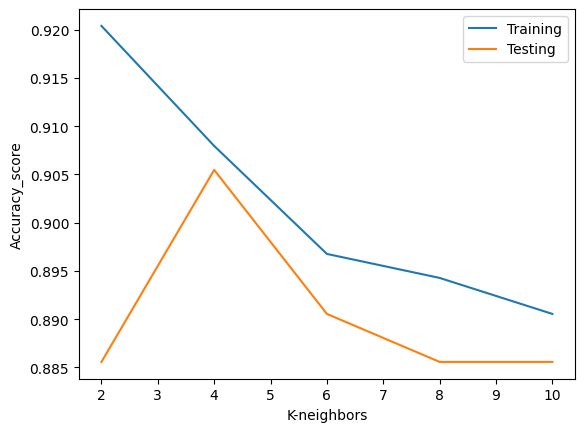

In [ ]:
# Plot `k_neighbors`, `training_acc`
plt.plot(k_neighbors , Training_acc , label= 'Training')
plt.plot(k_neighbors , Testing_acc , label= 'Testing')
plt.xlabel('K-neighbors')
plt.ylabel('Accuracy_score')
plt.legend();

berdasarkan hasil Visualisasi parameter terbaik n_neighbors di 4

In [ ]:
final_model = KNeighborsClassifier(n_neighbors= 4)

In [ ]:
final_model.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
model_knn.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [ ]:
knn_pred = model_knn.predict(x_test)
models.loc['accuracy_score','KNN'] = accuracy_score(y_test, knn_pred)

## 4.2 Random Forest Classifier

In [ ]:
clf = RandomForestClassifier(random_state= 42)

In [ ]:
params = {
    'max_depth': range(10 , 60 , 10),
    'n_estimators': range(25 , 100 , 25)
}
params

{'max_depth': range(10, 60, 10), 'n_estimators': range(25, 100, 25)}

In [ ]:
rfc_model = GridSearchCV(
    clf,
    param_grid= params,
    cv= 5,
    n_jobs= -1,
    verbose=1
)
rfc_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 60, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [ ]:
rfc_model.fit(X_train , y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 60, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [ ]:
cv_results = pd.DataFrame(rfc_model.cv_results_)
cv_results.sort_values(by= 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.13,0.02,0.01,0.00,30,50,"{'max_depth': 30, 'n_estimators': 50}",0.91,0.89,0.91,0.89,0.91,0.90,0.01,1
4,0.11,0.00,0.01,0.00,20,50,"{'max_depth': 20, 'n_estimators': 50}",0.91,0.89,0.91,0.89,0.91,0.90,0.01,1
13,0.11,0.00,0.01,0.00,50,50,"{'max_depth': 50, 'n_estimators': 50}",0.91,0.89,0.91,0.89,0.91,0.90,0.01,1
10,0.19,0.02,0.01,0.01,40,50,"{'max_depth': 40, 'n_estimators': 50}",0.91,0.89,0.91,0.89,0.91,0.90,0.01,1
8,0.27,0.05,0.01,0.00,30,75,"{'max_depth': 30, 'n_estimators': 75}",0.91,0.89,0.91,0.88,0.91,0.90,0.01,5
11,0.20,0.04,0.01,0.00,40,75,"{'max_depth': 40, 'n_estimators': 75}",0.91,0.89,0.91,0.88,0.91,0.90,0.01,5
5,0.17,0.01,0.01,0.00,20,75,"{'max_depth': 20, 'n_estimators': 75}",0.91,0.89,0.91,0.88,0.91,0.90,0.01,5
14,0.16,0.01,0.01,0.00,50,75,"{'max_depth': 50, 'n_estimators': 75}",0.91,0.89,0.91,0.88,0.91,0.90,0.01,5
2,0.16,0.00,0.01,0.00,10,75,"{'max_depth': 10, 'n_estimators': 75}",0.91,0.89,0.91,0.88,0.90,0.90,0.01,9
1,0.12,0.01,0.01,0.00,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.91,0.89,0.90,0.88,0.91,0.90,0.01,10


In [ ]:
rfc_model.best_params_

{'max_depth': 20, 'n_estimators': 50}

In [ ]:
rfc_model.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0])

In [ ]:
model_rf = RandomForestClassifier(max_depth= 20)
model_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=20)

In [ ]:
rf_pred = model_rf.predict(x_test)
models.loc['accuracy_score','RandomForest'] = accuracy_score(y_test, rf_pred)

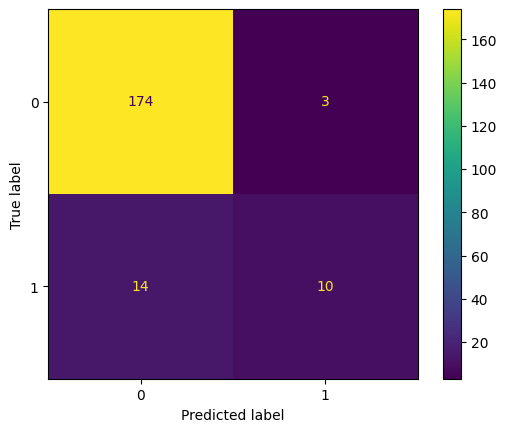

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    rfc_model,
    X_test,
    y_test
);

## 4.3 Gradient Boosting Classifier

In [ ]:
clf = GradientBoostingClassifier(random_state= 42)

In [ ]:
params = {
    'n_estimators': range(25 , 125 , 25),
    'max_depth': range(3 , 45 , 10)
}
params

{'n_estimators': range(25, 125, 25), 'max_depth': range(3, 45, 10)}

In [ ]:
gbc = GridSearchCV(
    clf,
    param_grid= params,
    cv= 5,
    n_jobs=-1,
    verbose=1
)
gbc

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 45, 10),
                         'n_estimators': range(25, 125, 25)},
             verbose=1)

In [ ]:
gbc.fit(X_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 45, 10),
                         'n_estimators': range(25, 125, 25)},
             verbose=1)

In [ ]:
cv_results = pd.DataFrame(gbc.cv_results_)
cv_results.sort_values(by= 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.25,0.01,0.00,0.00,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.90,0.88,0.91,0.88,0.91,0.90,0.01,1
2,0.18,0.00,0.00,0.00,3,75,"{'max_depth': 3, 'n_estimators': 75}",0.91,0.87,0.91,0.88,0.91,0.90,0.02,2
0,0.07,0.01,0.00,0.00,3,25,"{'max_depth': 3, 'n_estimators': 25}",0.92,0.88,0.90,0.86,0.91,0.89,0.02,3
1,0.13,0.01,0.00,0.00,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.91,0.87,0.91,0.87,0.91,0.89,0.02,4
13,0.40,0.02,0.00,0.00,33,50,"{'max_depth': 33, 'n_estimators': 50}",0.86,0.88,0.90,0.84,0.89,0.87,0.02,5
9,0.38,0.02,0.00,0.00,23,50,"{'max_depth': 23, 'n_estimators': 50}",0.86,0.88,0.90,0.84,0.89,0.87,0.02,5
17,0.38,0.02,0.00,0.00,43,50,"{'max_depth': 43, 'n_estimators': 50}",0.86,0.88,0.90,0.84,0.89,0.87,0.02,5
8,0.20,0.01,0.00,0.00,23,25,"{'max_depth': 23, 'n_estimators': 25}",0.85,0.87,0.91,0.84,0.89,0.87,0.03,8
16,0.19,0.01,0.00,0.00,43,25,"{'max_depth': 43, 'n_estimators': 25}",0.85,0.87,0.91,0.84,0.89,0.87,0.03,8
12,0.19,0.01,0.00,0.00,33,25,"{'max_depth': 33, 'n_estimators': 25}",0.85,0.87,0.91,0.84,0.89,0.87,0.03,8


In [ ]:
gbc.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [ ]:
gbc.predict(X_test)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0])

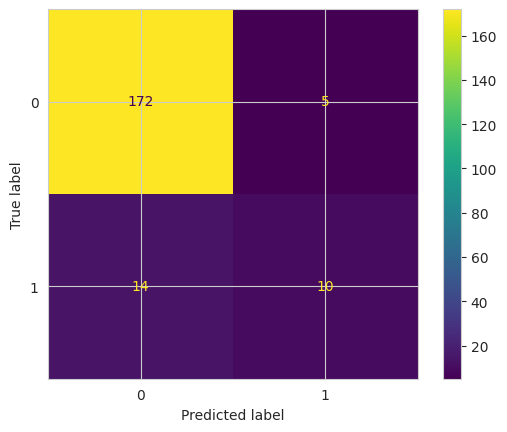

In [ ]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    gbc,
    X_test,
    y_test
);

# 5. Evaluasi Model

## 5.1 Score Model

In [ ]:
print(
    classification_report(
        y_test,
        gbc.predict(X_test)
    )
)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       177
           1       0.67      0.42      0.51        24

    accuracy                           0.91       201
   macro avg       0.80      0.69      0.73       201
weighted avg       0.89      0.91      0.90       201



In [ ]:
models = {
    "model" : ['KNeighborsClassifier' , 'RandomForestClassifier' , 'GradientBoostingClassifier'],
    "Score": [final_model.score(X_test , y_test) ,rfc_model.score(X_test , y_test) , gbc.score(X_test , y_test) ]
}
models

{'model': ['KNeighborsClassifier',
  'RandomForestClassifier',
  'GradientBoostingClassifier'],
 'Score': [0.9054726368159204, 0.9154228855721394, 0.9054726368159204]}

## 5.2 Plot Model

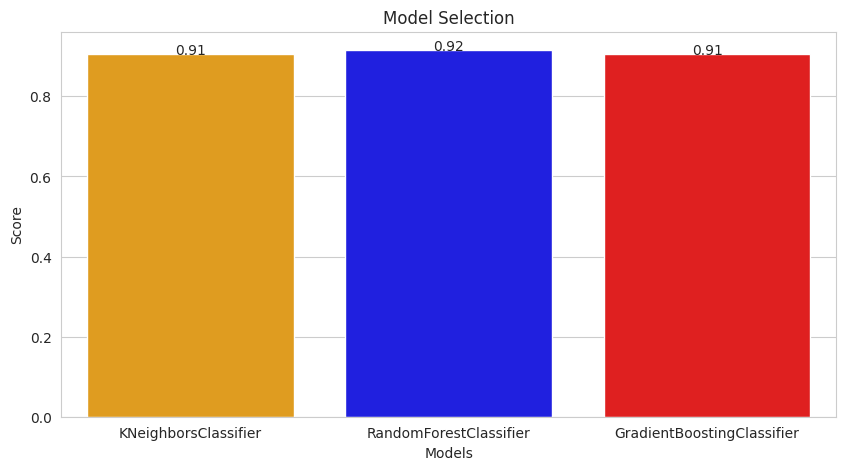

In [ ]:
colors= ['orange' , 'blue','red']
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
ax = sns.barplot(x=models['model'],y=models['Score'], palette=colors )
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Selection")

# Add value labels to each bar
for p in ax.patches:
    ax.text(x=p.get_x() + p.get_width() / 2.,
            y=p.get_height(),
            s='{:.2f}'.format(p.get_height()),
            ha='center')

plt.show();

Berdasarkan hasil visualisasi Model yang paling bagus adalah Random Forest Classifier dengan akurasi (0,92)